In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib as plb
import seaborn as sns
import scipy.stats as stats
import statistics
import dabest as db
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
s1f1 = pd.read_csv('D:/_2021_08_screen/S1fu/ubf_ia.csv', index_col=0)
cx10_x = pd.read_csv('D:/_2021_08_screen/S1fu/allReps_over150/150_CX10.csv', index_col=0)
pr678_x = pd.read_csv('D:/_2021_08_screen/S1fu/allReps_over150/150_PR678.csv', index_col=0)


In [3]:
sub_cols = ['control', 'test', 'difference', 'bca_low', 'bca_high']
pr678_meandiff = pd.read_csv('D:/_2021_08_screen/S1fu/PR678_meandif.csv', index_col=0, usecols=sub_cols)
pr678_meandiff['Strain'] = 'PR678'

In [5]:
worm_locs_foldr = plb.Path('D:/_2021_08_screen/S1fu/124_ia/')

In [5]:
s1f1_groups = s1f1_clean.groupby(['Compound', 'Strain']).mean().reset_index()

In [6]:
s1f1_groups.to_csv('D:/_2021_08_screen/S1fu/s1f1_sumdat.csv')


In [7]:
def mean_worm_locs(row, wrms): 

    fname = row['File Name']
    wellnum = row['WellNo']


    loc_fname =  wrms.joinpath('loc_' + fname + '_' + wellnum + '.csv')
    temp = pd.read_csv(loc_fname)
    compound = row['Compound']
    xs_mean = temp['X'].mean()

    #print(xs_mean)
    #xs = list(temp['centroid-1'])
    xs_mean_mm = xs_mean/(1200/25.4)
    return (xs_mean_mm)

s1f1['MeanX'] = s1f1.apply(
    lambda row: mean_worm_locs(row, worm_locs_foldr), axis=1)


In [8]:
s1f1.head()

,WellNo,Total Worms,Chemotaxis,Compound,Strain,File Name,Well width,Plate ID,MeanX
1,1B,199.0,0.233533,Carnosol,CX10,S1F1_001,3044.0,S1F1_R1_01,27.772828
2,1C,306.0,0.225352,Limonin,CX10,S1F1_001,3044.0,S1F1_R1_01,27.581666
3,1D,208.0,0.390374,H2O,CX10,S1F1_001,3057.0,S1F1_R1_01,25.865496
4,2A,282.0,-0.019920,Isoquinoline,CX10,S1F1_001,3057.0,S1F1_R1_02,32.894225
5,2B,239.0,0.171429,2-Nonylquinolin-4(1H)-one,CX10,S1F1_001,3043.0,S1F1_R1_02,29.706333


In [9]:
s1f1.to_csv('D:/_2021_08_screen/S1fu/ubf_ia.csv')

In [9]:
cx10 = s1f1_clean.loc[s1f1_clean['Strain'] == 'CX10']
pr678 = s1f1_clean.loc[s1f1_clean['Strain'] == 'PR678']


In [10]:
s1_dat = pd.read_csv('D:/_2021_08_screen/analysis/mean_diff_mm.csv', index_col=0, usecols=sub_cols )
print(len(s1_dat))

95


In [11]:
subset = list(cx10['Compound'].unique())
s1_sub = s1_dat[s1_dat['test'].isin(subset)]
s1_sub['Strain'] = 'N2'
s1_sub.head()

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,test,difference,bca_low,bca_high,Strain
control,,,,,
DMSO,H2O,0.418416,-1.042545,1.888610,N2
DMSO,1-octanol,-7.446258,-8.944625,-5.916856,N2
DMSO,Phytol,-6.248916,-7.800290,-4.622622,N2
DMSO,Ellagic acid,-4.088034,-5.535870,-2.637354,N2
DMSO,Methyl palmitate,-3.983911,-5.508219,-2.496946,N2


In [12]:
pr678_N2 = pr678_meandiff.append(s1_sub)
pr678_N2.tail()

,test,difference,bca_low,bca_high,Strain
control,,,,,
DMSO,"2,3-Dihydrobenzofuran",9.194467,7.599136,10.748634,N2
DMSO,Thiophene,9.759898,8.202217,11.263300,N2
DMSO,2-Methyl-1-butanol,11.977237,10.335739,13.611902,N2
DMSO,Diacetyl,10.639407,9.178807,12.033858,N2
DMSO,Isoamyl alcohol,14.016863,12.688714,15.328460,N2


In [14]:
PR_model = ols('MeanX ~ C(Compound)', data=pr678).fit()
PR_aov_table = sm.stats.anova_lm(PR_model, typ=2)
PR_aov_table

,sum_sq,df,F,PR(>F)
C(Compound),1156.628790,44.0,4.593165,4.779305e-10
Residual,515.076601,90.0,NaN,NaN


In [15]:
cx_model = ols('MeanX ~ C(Compound)', data=cx10).fit()
cx_aov_table = sm.stats.anova_lm(cx_model, typ=2)
cx_aov_table

,sum_sq,df,F,PR(>F)
C(Compound),1431.055445,44.0,3.766989,5.060531e-08
Residual,777.055331,90.0,NaN,NaN


In [16]:
tukey = pairwise_tukeyhsd(endog=cx10['MeanX'],
                          groups=cx10['Compound'],
                          alpha=0.05)
print(tukey)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                    group2          meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------------------------
          (-)-Huperzine A                 1-octanol   2.1363    0.9  -7.6657 11.9383  False
          (-)-Huperzine A     2,3-Dihydrobenzofuran  -9.1674  0.107 -18.9694  0.6346  False
          (-)-Huperzine A 2,5-Dihydroxybenzoic acid   2.6198    0.9  -7.1823 12.4218  False
          (-)-Huperzine A        2-Methyl-1-butanol  -10.236 0.0285  -20.038  -0.434   True
          (-)-Huperzine A 2-Nonylquinolin-4(1H)-one  -1.4924    0.9 -11.2944  8.3097  False
          (-)-Huperzine A                2-nonanone   4.8252    0.9  -4.9768 14.6272  False
          (-)-Huperzine A              Acetophenone  -0.3511    0.9 -10.1532  9.4509  False
          (-)-Huperzine A                   Anisole  -4.1817    0.9 -13.9837  5.

In [17]:
tukey_pr = pairwise_tukeyhsd(endog=pr678['MeanX'],
                          groups=pr678['Compound'],
                          alpha=0.05)


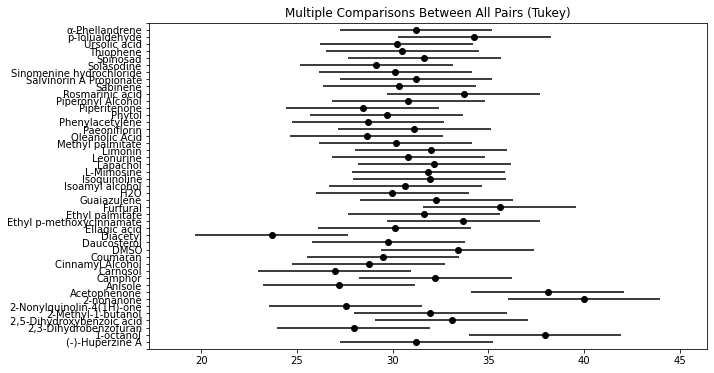

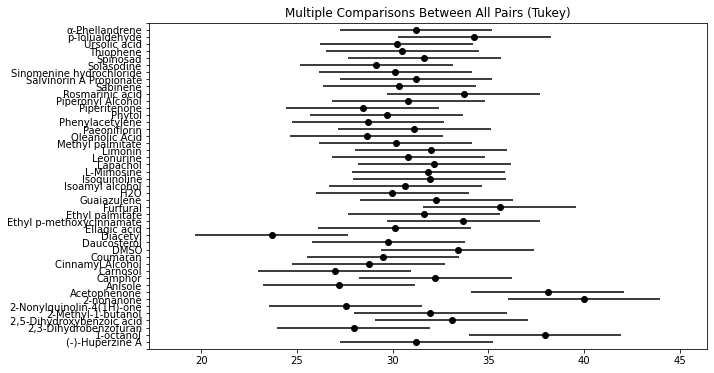

In [55]:
tukey_pr.plot_simultaneous()

In [11]:
pr678_refs = pr678_x[['DMSO','H2O', '1-octanol', '2-nonanone', 'Isoamyl alcohol', 'Diacetyl']].copy()


In [12]:
cx10_refs = cx10_x[['DMSO', 'H2O', '1-octanol', '2-nonanone', 'Isoamyl alcohol', 'Diacetyl']].copy()


In [69]:
cx_color_dict={'DMSO':'#bbb2e2','H2O':'#bbb2e2', 'Diacetyl':'#66c2a5', 'Isoamyl alcohol':'#66c2a5', '1-octanol':'#fdae61', '2-nonanone':'#fdae61'}
PR_color_dict={'DMSO':'#5e4fa2','H2O':'#5e4fa2', 'Diacetyl':'#079468', 'Isoamyl alcohol':'#079468', '1-octanol':'#d06903', '2-nonanone':'#d06903'}

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


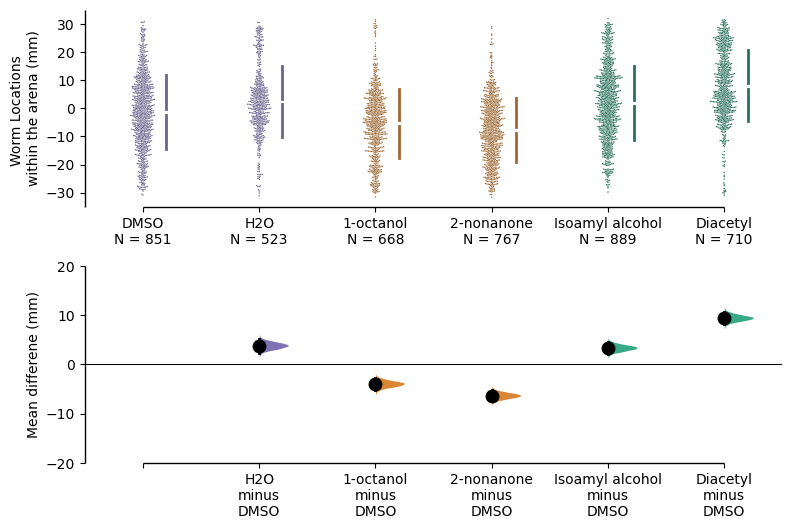

In [70]:
subset = ['DMSO', 'H2O', '1-octanol', '2-nonanone', 'Isoamyl alcohol', 'Diacetyl']
pr678_CI_ob = db.load(pr678_refs, idx=(subset))
pr678_md = pr678_CI_ob.mean_diff
pr678_md.plot(raw_marker_size=1, swarm_label = 'Worm Locations \nwithin the arena (mm)', 
                                        contrast_label="Mean differene (mm)", contrast_ylim = (-20,20), swarm_ylim=(-35,35), custom_palette=PR_color_dict)

plt.savefig('D:/NP_manuscript/pr678_refs.png')

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


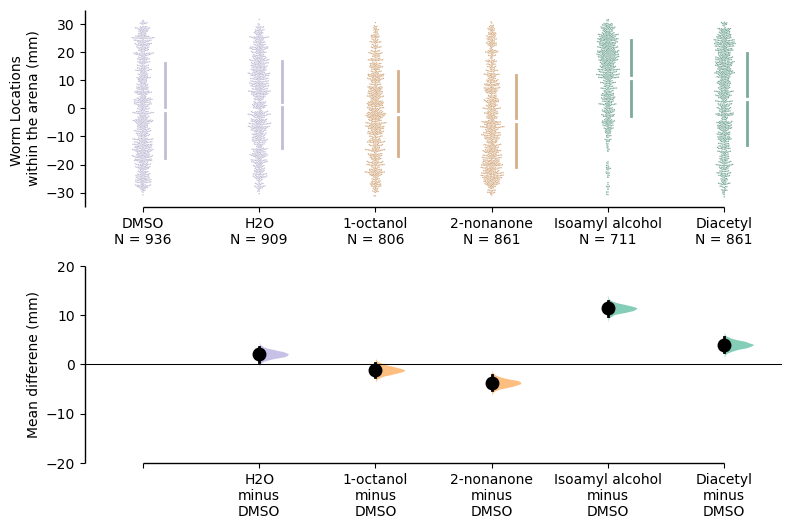

In [72]:
cx10_CI_ob = db.load(cx10_refs, idx=(subset))
cx10_md = cx10_CI_ob.mean_diff
cx10_md.plot(raw_marker_size=1, swarm_label = 'Worm Locations \nwithin the arena (mm)', 
                                        contrast_label="Mean differene (mm)", contrast_ylim = (-20,20), swarm_ylim=(-35,35), custom_palette=cx_color_dict)
plt.savefig('D:/NP_manuscript/cx10_refs.png')

In [60]:
pr678_x.head()

,(-)-Huperzine A,1-octanol,"2,3-Dihydrobenzofuran","2,5-Dihydroxybenzoic acid",2-Methyl-1-butanol,2-nonanone,2-Nonylquinolin-4(1H)-one,Acetophenone,Anisole,Camphor,...,Piperonyl Alcohol,p-Tolualdehyde,Rosmarinic acid,Sabinene,Salvinorin A Propionate,Sinomenine hydrochloride,Solasodine,Spinosad,Thiophene,Ursolic acid
0,23.024956,-20.498239,6.847736,-18.584675,3.684531,0.463578,-18.154303,-9.306667,-7.551035,24.463451,...,-6.650717,3.945525,18.791880,-3.028445,23.851406,-5.071203,22.044516,1.002775,21.419556,-8.841420
1,20.176723,-8.249082,4.191130,14.297773,8.628659,-2.145559,-18.416150,-3.408721,-14.597597,24.084277,...,-23.082223,-10.179404,20.563147,-2.135646,22.306727,-17.712857,9.599446,18.257787,14.134875,-7.434259
2,16.699395,-20.860330,5.417064,-15.454689,-2.507303,-19.737748,8.481029,-0.834438,0.305697,8.646191,...,-5.166490,-16.539762,7.159151,4.307833,10.980034,-2.743246,16.179767,-25.075749,23.490825,-19.123484
3,-2.553252,-5.035621,18.673272,-23.396622,4.938680,-21.654589,-9.262071,-8.171750,8.163213,12.007643,...,7.638636,7.567289,18.537253,-3.593576,13.642502,-5.054525,-12.550506,10.415939,0.309299,18.157532
4,7.874577,-14.747207,3.018208,-16.682187,-6.994067,-15.319255,20.035884,10.304895,-6.688223,-1.152004,...,11.027511,12.888530,6.875248,15.634466,11.497070,-24.284584,0.376056,11.172623,3.657706,-20.842436
